In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
df_1 = pd.read_csv('../data/data_2__.csv')
df_1 = df_1.drop(['index'],axis=1)
df_1.head()

,data,valor
0,2014-07-18,1.50
1,2014-08-05,83.20
2,2014-08-08,22.50
3,2014-08-11,15.91
4,2014-08-12,0.44


In [3]:
df_1.tail(31)

,data,valor
1511,2018-10-01,11574.30
1512,2018-10-02,11745.41
1513,2018-10-03,12396.01
1514,2018-10-04,12038.50
1515,2018-10-05,16057.87
1516,2018-10-06,22377.21
1517,2018-10-07,11441.12
1518,2018-10-08,11824.10
1519,2018-10-09,11556.20
1520,2018-10-10,12886.30


In [4]:
df_1.describe()

,valor
count,1542.000000
mean,10956.127516
std,5286.030580
min,0.440000
25%,7531.375000
50%,10578.795000
75%,14732.757500
max,27351.500000


In [5]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [6]:
df = df_1
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2014-07-18,1.50
1,2014-08-05,83.20
2,2014-08-08,22.50
3,2014-08-11,15.91
4,2014-08-12,0.44


In [7]:
prediction_size = 31
train_df = df[:-prediction_size]

In [8]:
train_df.tail()

,ds,y
1506,2018-09-26,12532.11
1507,2018-09-27,11802.44
1508,2018-09-28,15858.01
1509,2018-09-29,21515.21
1510,2018-09-30,19539.03


In [9]:
m = Prophet()
m.fit(train_df)

In [10]:
future = m.make_future_dataframe(periods=31)

forecast = m.predict(future)

In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1537,2018-10-27,14738.718443,16169.601014,22181.198819,14718.147710,14747.398940,4477.528180,4477.528180,4477.528180,5395.936627,5395.936627,5395.936627,-918.408448,-918.408448,-918.408448,0.0,0.0,0.0,19216.246623
1538,2018-10-28,14744.662427,14209.774599,20181.919242,14722.458079,14755.576048,2350.831022,2350.831022,2350.831022,3315.131947,3315.131947,3315.131947,-964.300924,-964.300924,-964.300924,0.0,0.0,0.0,17095.493449
1539,2018-10-29,14750.606410,8347.615175,14198.446497,14727.177968,14762.729494,-3573.054926,-3573.054926,-3573.054926,-2574.579489,-2574.579489,-2574.579489,-998.475436,-998.475436,-998.475436,0.0,0.0,0.0,11177.551484
1540,2018-10-30,14756.550393,8167.528847,14059.062680,14731.640172,14771.306919,-3676.595075,-3676.595075,-3676.595075,-2656.451665,-2656.451665,-2656.451665,-1020.143410,-1020.143410,-1020.143410,0.0,0.0,0.0,11079.955318
1541,2018-10-31,14762.494377,8319.262836,14187.640192,14736.541305,14779.834703,-3351.233247,-3351.233247,-3351.233247,-2322.430950,-2322.430950,-2322.430950,-1028.802297,-1028.802297,-1028.802297,0.0,0.0,0.0,11411.261130


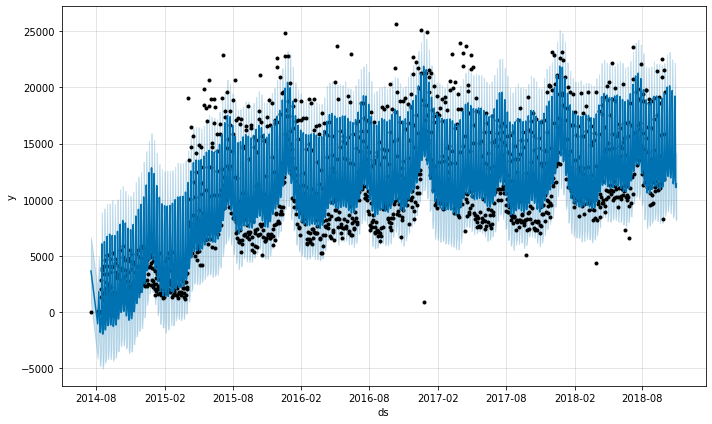

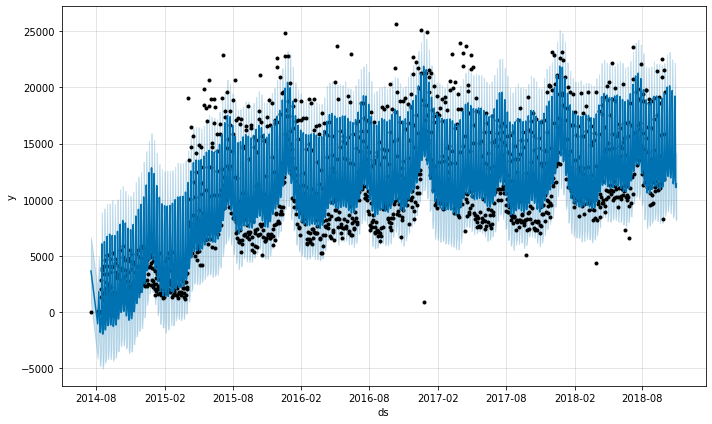

In [12]:
m.plot(forecast)

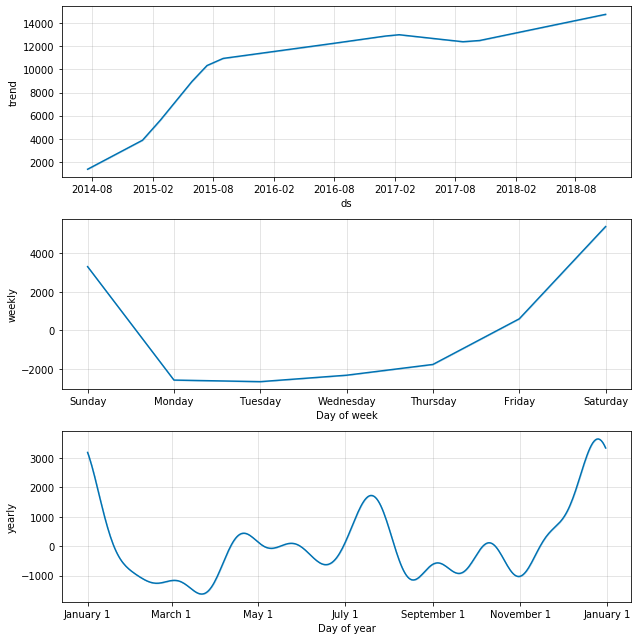

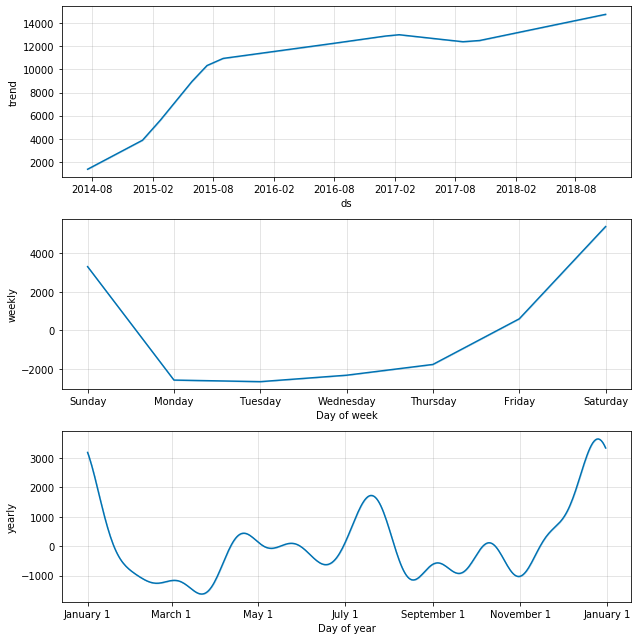

In [13]:
m.plot_components(forecast)

In [14]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [15]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df = cmp_df.dropna()

In [16]:
print('MAE:', metrics.mean_absolute_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))  
print('MSE:', metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:])))

MAE: 1536.3981633242229
MSE: 8318457.199489678
RMSE: 2884.173573051677


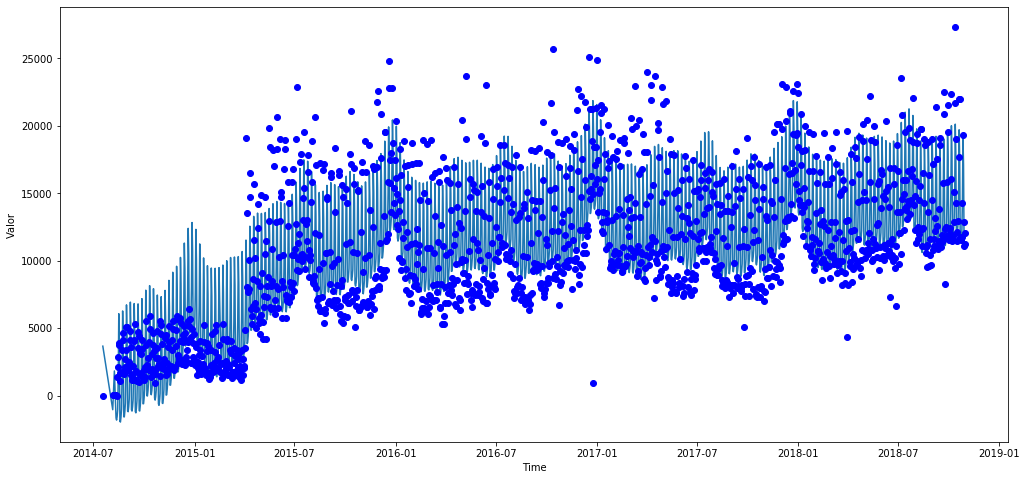

In [17]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'],'bo')
plt.xlabel('Time')
plt.ylabel('Valor')
plt.grid(False)
plt.show()